In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/Advertising.csv', index_col=0) # index_col=0 means that the first column is the index
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory data analysis

In [435]:
df.info()
# No missing values
# 200 rows, 4 columns
# all data types are float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [436]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [437]:
df.describe().T # Transpose the table
# interested in sales
# how much do we have to spend on TV, radio, newspaper to get better sales?
# tv, radio, newspaper are the features
# sales is the target

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [438]:
df.shape # 200 samples, 3 features, 1 label/target

(200, 4)

number_features=3
df.shape[1]-1=3
df.columns[:-1]=Index(['TV', 'Radio', 'Newspaper'], dtype='object')
This is feature 1 of 3, which is TV
This is feature 2 of 3, which is Radio
This is feature 3 of 3, which is Newspaper


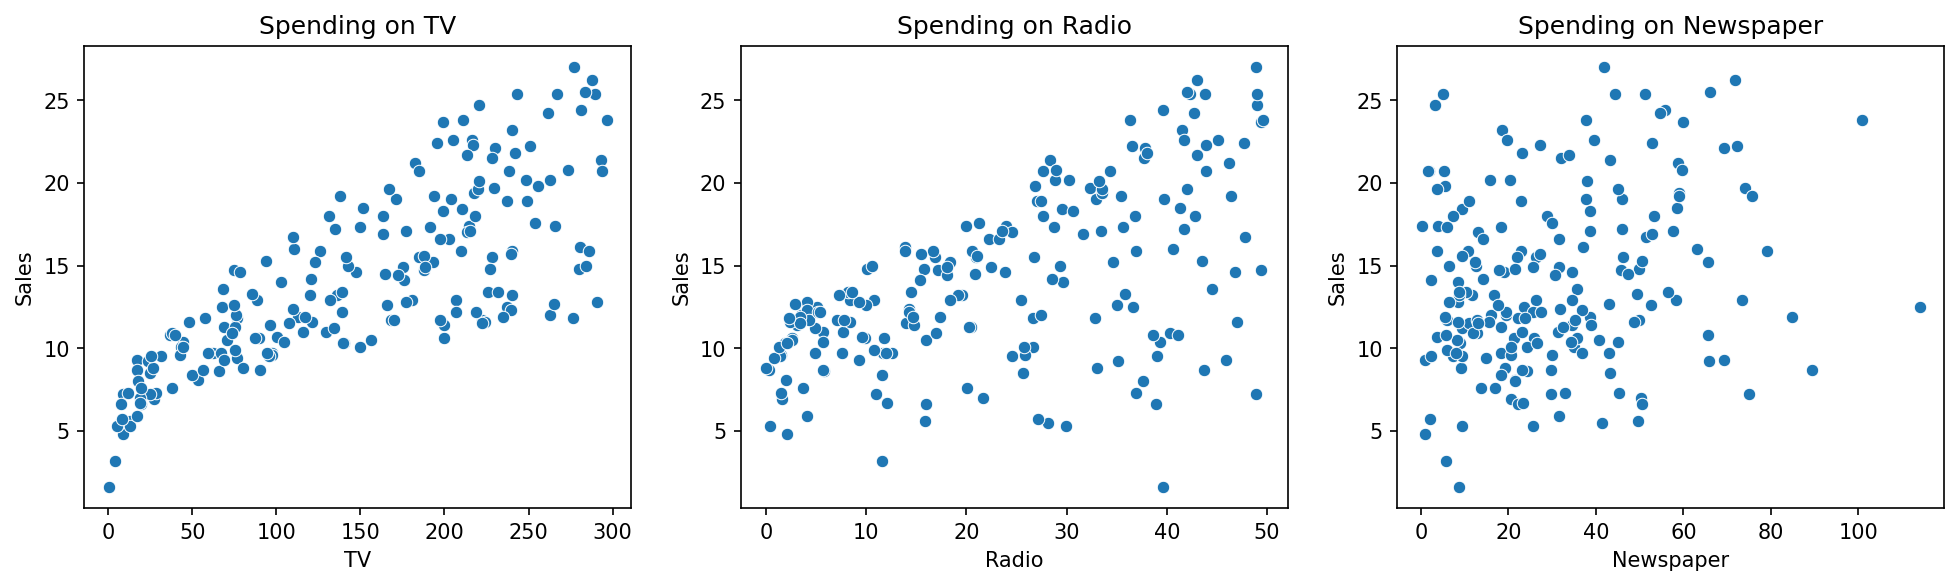

In [439]:
number_features = df.shape[1]-1 # df.shape[1] is the number of columns, -1 because we don't want to count the label/target

print(f'{number_features=}')
print(f'{df.shape[1]-1=}')
print(f'{df.columns[:-1]=}')

fig, ax = plt.subplots(1, number_features, figsize=(16, 4), dpi = 150) # 1 is the number of rows and number_features is the number of columns

for i, feature in enumerate(df.columns[:-1]): 
    sns.scatterplot(data = df, x = feature, y = 'Sales', ax = ax[i])
    ax[i].set_title(f'Spending on {feature}')
    print(f'This is feature {i+1} of {number_features}, which is {feature}')

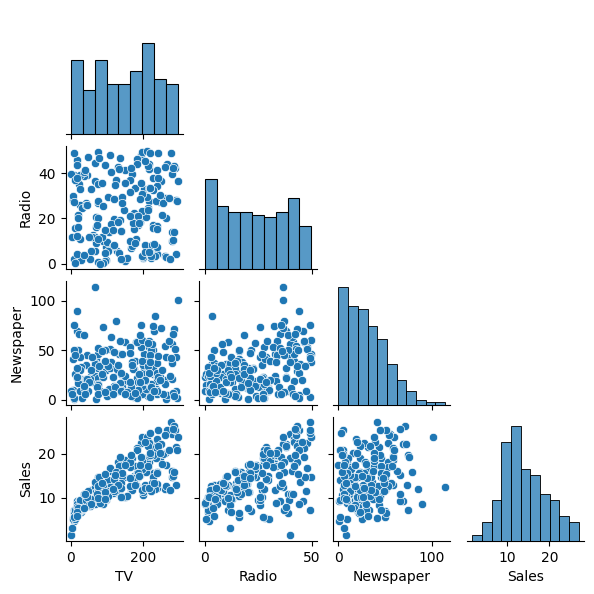

In [440]:
ax = sns.pairplot(df, height = 1.5, corner = True) 

### Simple linear regression

In [441]:
X, y = df['TV'], df['Sales']

X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [442]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [443]:
X.shape, y.shape

((200,), (200,))

In [444]:
# polyfit is a function that fits a polynomial of degree deg to the data
# and returns the coefficients of the polynomial that minimizes the squared error
# the function in theory looks like this: beta_hat = (X.T @ X)^-1 @ X.T @ y --> this is the normal equation
beta_1, beta_0 = np.polyfit(X, y, deg = 1) # deg = 1 means that we want to fit a line (degree 1 polynomial)
beta_0, beta_1

(7.032593549127696, 0.04753664043301972)

[Text(0.5, 1.0, 'Regression line on TV advertismenet and sales')]

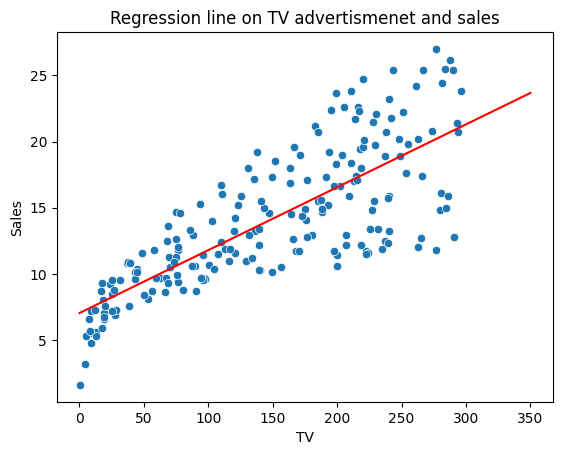

In [445]:
# based on the beta_0 and beta_1 values, we can create a function that will predict the sales based on the TV spending
y_hat = lambda x: beta_0 + beta_1 * x 

spending = np.linspace(0, 350) # this is the range of spending on TV

ax = sns.scatterplot(data = df, x = 'TV', y = 'Sales')
# spending stretches from 0 to 350(spending)
# y_hat(spending): we pass the spending argument to the y_hat function to get the slope of the line
sns.lineplot(x = spending, y = y_hat(spending), color = 'red') 
ax.set(title = 'Regression line on TV advertismenet and sales')

<Axes: xlabel='TV', ylabel='Sales'>

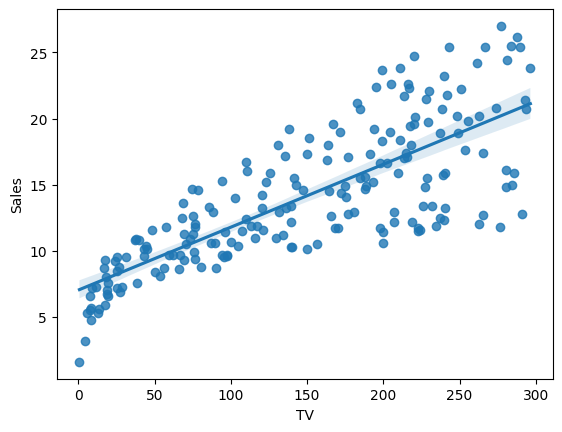

In [446]:
# this is the same as the previous plot but with a regression line and a confidence interval, this is a shortcut
sns.regplot(x=X, y=y) 

### Multiple linear regression

In [447]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [448]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [449]:
# 0 is the position where we want to insert the column, "Intercept" is the name of the column, 1 is the value of the column
# this applies in pandas, not in numpy
# in numpy we would use np.insert(X, 0, 1, axis=1)
# X is the array, 0 is the position where we want to insert the column, 1 is the value of the column
# axis=1 means that we want to insert the column in the second dimension 
X.insert(loc=0, column="Intercept", value=1)

In [450]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [451]:
X.shape, y.shape

((200, 4), (200,))

In [452]:
# @ operator - matmul operator
# in numpy - the matmul operator is operator overloaded to handle matrix multiplication

X.T@X # X.T is the transpose of X and @ is the matmul operator (matrix multiplication)

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [453]:
#   normal equation - OLS - Ordinary Least Squares
# np.linalg is the linear algebra module in numpy that contains the inverse function which is used in the normal equation
beta_hat = np.linalg.inv(X.T@X)@X.T@y 
beta_hat # beta_hat is a vector of coefficients (beta_0 = 2.938889, beta_1 = 0.045765, beta_2 = 0.188530, beta_3 = -0.001037)

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [454]:
# we've created a function that takes any X and y and returns beta_hat using lambda
regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y 
beta_hat = regression_fit(X, y)
beta_hat 

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [455]:
predict = lambda x, beta: np.dot(x, beta) # np.dot is the dot product of two arrays (x and beta) --> skalär produkt

test_sample = [1, 230, 38, 69] # 1 is the intercept, 230 is the TV spending, 38 is the radio spending and 69 is the newspaper spending
y_hat = predict(test_sample, beta_hat)
print(f"With $230k spent on TV, $38k on radio and $69k on newspaper, we predict sales of {y_hat:.1f}k units")

With $230k spent on TV, $38k on radio and $69k on newspaper, we predict sales of 20.6k units


### Train|test split

In [456]:
train_fraction = int(len(df) * 0.7) # 70% of the data

# df.sample() is a random sample of the dataframe
# replace=False we don't want to sample the same row twice (no duplicates)
train = df.sample(n=train_fraction, random_state=42, replace=False) 
train.head()

,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [457]:
test = df.drop(train.index) 
train.shape, test.shape # we have to control that the train and test sets are not overlapping

((140, 4), (60, 4))

In [458]:
X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

In [459]:
X_test.iloc[1]

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

### Prediction

In [460]:
beta_hat = regression_fit(X_train, y_train)
print(f"beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4, 1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [461]:
X_test.iloc[1]
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper, gives us a prediction of 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

### Evaluate model performance

In [462]:
m = len(y_test)

# removed extra dimension (60, 1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m * np.sum(np.abs(y_test - y_hat))
mean_squared_error = 1/m * np.sum((y_test - y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)